Import the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving traffic volume.csv to traffic volume (1).csv


In [ ]:
import pandas as pd
df = pd.read_csv("traffic volume.csv")

Checking for Null Values

In [ ]:
print(df.isnull().sum())

holiday           48143
temp                 53
rain                  2
snow                 12
weather              49
date                  0
Time                  0
traffic_volume        0
dtype: int64


Data Visualization

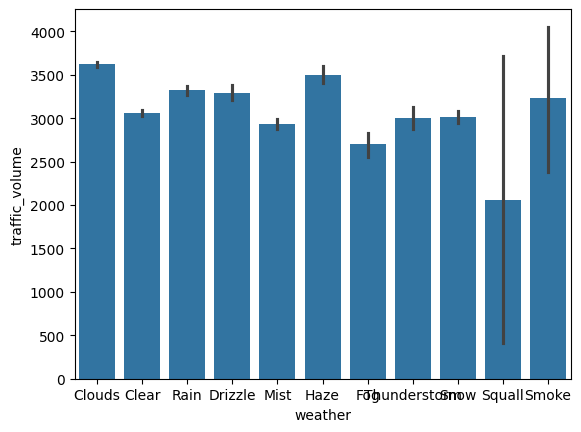

In [ ]:
sns.barplot(x='weather', y='traffic_volume', data=df)
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


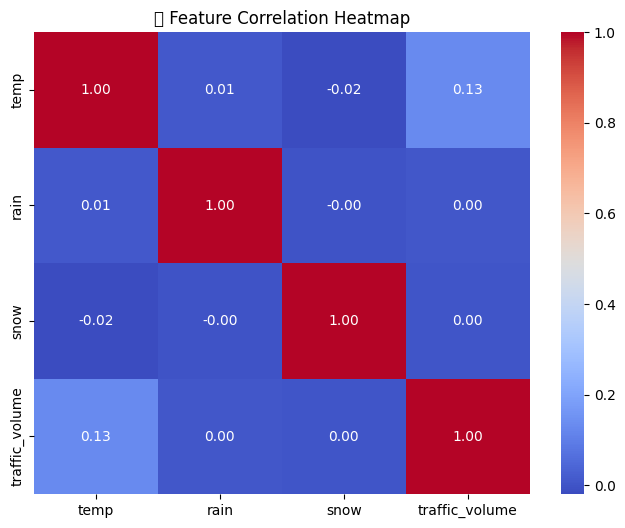

In [ ]:
plt.figure(figsize=(8,6))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("📊 Feature Correlation Heatmap")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


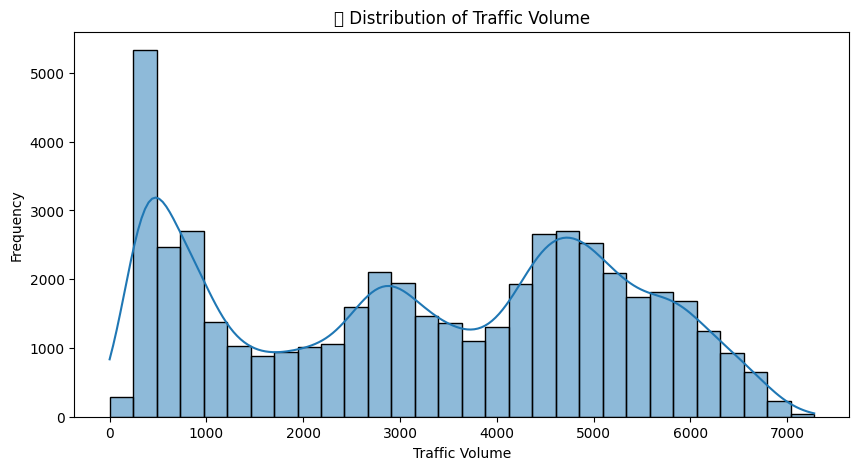

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['traffic_volume'], bins=30, kde=True)
plt.title("📊 Distribution of Traffic Volume")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.show()

Taking care of Missing Data

In [ ]:
df.drop(columns=['holiday'], inplace=True)
df['temp'].fillna(df['temp'].mean(), inplace=True)
df['rain'].fillna(df['rain'].mean(), inplace=True)
df['snow'].fillna(df['snow'].mean(), inplace=True)
df['weather'].fillna(df['weather'].mode()[0], inplace=True)
print(df.isnull().sum())

temp              0
rain              0
snow              0
weather           0
date              0
Time              0
traffic_volume    0
dtype: int64


<ipython-input-30-3725499825>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['temp'].fillna(df['temp'].mean(), inplace=True)
<ipython-input-30-3725499825>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['temp']] = scaler.fit_transform(df[['temp']])

In [ ]:
df = pd.get_dummies(df, columns=['weather'])

In [ ]:

df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.weekday
df['year'] = df['date'].dt.year

In [ ]:

df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
df['hour'] = df['Time'].dt.hour
df.drop(columns=['Time'], inplace=True)

In [ ]:
df = pd.get_dummies(df, columns=['holiday'], drop_first=True)

KeyError: "None of [Index(['holiday'], dtype='object')] are in the [columns]"

In [ ]:
df = pd.get_dummies(df, columns=['weather'], drop_first=True)

KeyError: "None of [Index(['weather'], dtype='object')] are in the [columns]"

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

# Extract numeric parts
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.weekday
df['year'] = df['date'].dt.year

# Now drop the datetime column
df.drop(columns=['date'], inplace=True)


In [ ]:
print(df.dtypes[df.dtypes == 'datetime64[ns]'])

Series([], dtype: object)


In [ ]:
df.drop(columns=['date'], inplace=True, errors='ignore')

In [ ]:
print(X_train.dtypes[X_train.dtypes == 'datetime64[ns]'])

date    datetime64[ns]
dtype: object


Spliting Data into Train and Test

In [ ]:
X = df.drop(columns=['traffic_volume'])
y = df['traffic_volume']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


Import the model building Libraries

In [ ]:
from sklearn.ensemble import RandomForestRegressor

Initializing the model

In [ ]:
model = RandomForestRegressor()

Training and Testing the model

In [ ]:
model.fit(X_train, y_train)

RandomForestRegressor()

Evalution of Model

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 133911.7457766103


save the model

In [ ]:
import joblib
joblib.dump(model, 'traffic_model.pkl')

['traffic_model.pkl']

In [ ]:
import os
print(os.listdir())


['.config', 'traffic volume.csv', 'traffic volume (1).csv', 'traffic_model.pkl', 'sample_data']


In [ ]:
from google.colab import files
files.download('traffic_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>